## Setup

In [0]:
!pip install tensorflow==2.0 -Uq

In [0]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
from matplotlib.animation import *
import numpy as np
import tensorflow.compat.v2 as tf

# Neural XOR Gate in TF 2.0

## Data

In [0]:
inputs = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]

outputs = [0, 1, 1, 0]

inputs, outputs = np.asarray(inputs, dtype="float"), np.asarray(outputs, dtype="float")

In [0]:
x_1 = np.arange(-1.0, 2.1, 0.1).tolist()
x_2 = np.arange(-1.0, 2.1, 0.1).tolist()
xv, yv = np.meshgrid(x_1, x_2)
x = np.stack([xv, yv], axis=-1)
x = x.reshape((len(x_1)*len(x_2), 2))

## Model

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(8, activation="tanh"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss="binary_crossentropy",
              optimizer="sgd")

loss = model.evaluate(inputs, outputs, verbose=0)

## Fitting with SGD

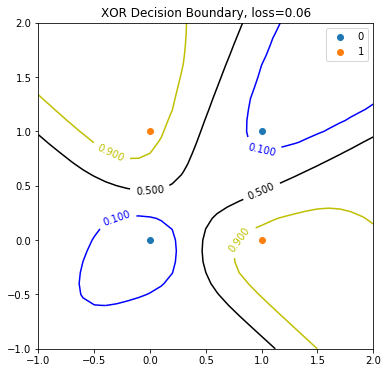

In [10]:
moviewriter = FFMpegWriter(fps=10)
fig, ax = plt.subplots(figsize=(6,6))
moviewriter.setup(fig, 'xor.mp4', dpi=100)
while loss > 0.05:
    preds = model.predict(x).reshape((len(x_1), len(x_2)))
    ax.cla()
    CS = ax.contour(x_1, x_2, preds, levels=[0.1,0.5,0.9], colors=['b', 'k', 'y'])
    ax.clabel(CS, inline=1, fontsize=10)
    ax.scatter([0,1], [0,1], label="0")
    ax.scatter([0,1], [1,0], label="1")
    ax.legend()
    plt.title("XOR Decision Boundary, loss=" + str(loss))
    moviewriter.grab_frame()
    model.fit(inputs, outputs, batch_size=1, epochs=3, verbose=0)
    loss = round(model.evaluate(inputs, outputs, verbose=0), 2)
    print("Loss:", loss)
    clear_output(wait=True)
moviewriter.finish()